# 개정도 Test Case
2018.11.14

#  
## TC ID 1

In [13]:
import pandas as pd
from collections import OrderedDict
import pickle
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from random import shuffle

%matplotlib inline
pd.set_option('max_colwidth', 800)

#  
## TC ID 2

In [16]:
path = 'E:\\unist\\gov\\rev_data\\'

def TC2_load_data():
    data = 'final_data_cluster.pickle'
    
    with open(path+data, 'rb') as f:
        df = pickle.load(f)
        f.close()

    df = df[df['RSN_CD']!='3_1']
    
    return df

df = TC2_load_data()
df.head(3)

,SHIP_NO,DWG_NO,MGR_NO,PUB_DT,REV_RSN_DESC,RSN_CD,DWG_TYPE,DWG_BLOCK,DWG_PROC,DWG_STAGE,DESC_TOKEN,SHIP_INFO,MH_CNFM_YN,CNFM_MH,LOG_CNFM_MH,REV_WK_DESC,cluster
0,815006,WA500FB51,RM6003,2016-07-19,[선주요구] spare propeller 주변 life line 추가 설치.(기장설계부 요청),1_G,W,A500,F,B,"[요구, spare, propeller, 주변, life, line, 추가, 설치, 기장, 설계, 요청]",81,Y,8.0,2.197225,"portable stanchion, socket, life line 추가설치",1_G/149
1,814906,WA600FB61,RF3008,2015-12-17,1. door catcher 고정용 support 수정. 2~3. 8148호선 시운전 comment 사항 후속선 개정도 발행건.,1_G,W,A600,F,B,"[door, 고정용, support, 수정, 호선, 시운전, comment, 사항, 후속, 개정, 발행]",81,Y,16.0,2.833213,"1. weather tight door hook용 support 설치. (e92p,e93s,n94c) 2. chain comp. 상부 lifting lug 설치. 3. canvas cover용 box seat 설치.",1_G/130
2,815006,WH12CT753,RT5008,2016-05-30,선주comment (s-092) em'cy headquarter room내 소화기위치 이동요구 (선주공급 compressor 및 bottle과 근접),1_G,W,H12C,T,7,"[comment, em, cy, room, 소화기, 위치, 이동, 요구, 공급, compressor, bottle, 근접]",81,Y,8.0,2.197225,1. 소화기 이동설치. (1set) 2. 선체 insulation 취외/복구. (2-point) 3. 도장/화기 damage 재시공 (4-point),1_G/26


#  
## TC ID 3

In [4]:
def TC3_apriori():
    apr = df.loc[:, ['RSN_CD', 'DWG_TYPE', 'DWG_BLOCK', 'DWG_PROC', 'DWG_STAGE', 'SHIP_INFO']]
    apr['DWG_BLOCK'] = apr['DWG_BLOCK'].str[:2]
    apr['SHIP_INFO'] = apr['SHIP_INFO'].str[0]
    apr = apr.apply(lambda x: x.name + '/' + x.astype(str))
    
    dataset=apr.astype(str).as_matrix()
    te = TransactionEncoder()
    te_ary = te.fit(dataset).transform(dataset)
    data = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(data, min_support=0.000000000001, use_colnames=True)
    
    return frequent_itemsets

#frequent_itemsets = TC3_apriori()

In [14]:
with open(path+'frequent_itemset_ownrcmt_N.pickle', 'rb') as f:
    frequent_itemsets = pickle.load(f)
    f.close()
frequent_itemsets.tail()

,support,itemsets
98386,0.000038,"[DWG_BLOCK/Y6, DWG_PROC/A, DWG_STAGE/2, DWG_TYPE/S, RSN_CD/1_E, SHIP_INFO/8]"
98387,0.000019,"[DWG_BLOCK/Y7, DWG_PROC/A, DWG_STAGE/2, DWG_TYPE/S, RSN_CD/1_1, SHIP_INFO/8]"
98388,0.000058,"[DWG_BLOCK/Y7, DWG_PROC/A, DWG_STAGE/2, DWG_TYPE/S, RSN_CD/1_7, SHIP_INFO/8]"
98389,0.000038,"[DWG_BLOCK/Y8, DWG_PROC/A, DWG_STAGE/2, DWG_TYPE/S, RSN_CD/1_E, SHIP_INFO/8]"
98390,0.000019,"[DWG_BLOCK/Y9, DWG_PROC/A, DWG_STAGE/2, DWG_TYPE/S, RSN_CD/1_E, SHIP_INFO/8]"


#  
## TC ID 4

In [17]:
def TC4_ARM():
    arm = association_rules(frequent_itemsets, metric="confidence", min_threshold=0)
    
    arm = arm.loc[(arm['consequents'].astype(str).str.contains('RSN_CD')) &\
                      (arm['consequents'].apply(len)==1), :]
    arm.loc[:, 'length'] = arm['antecedants'].apply(lambda x: len(x)).tolist()
    
    with open(path+'arm_ownrcmt_N.pickle', 'wb') as f:
        pickle.dump(arm, f)
        f.close()
        
    return arm

arm = TC4_ARM()
arm.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
6,(DWG_BLOCK/03),(RSN_CD/1_G),0.000058,0.218252,0.000019,0.333333,1.527286,0.000007,1.172622,1
8,(DWG_BLOCK/03),(RSN_CD/4_1),0.000058,0.014512,0.000038,0.666667,45.939956,0.000038,2.956465,1
20,(DWG_BLOCK/11),(RSN_CD/1_G),0.000077,0.218252,0.000038,0.500000,2.290929,0.000022,1.563496,1
22,(DWG_BLOCK/11),(RSN_CD/6_1),0.000077,0.018567,0.000038,0.500000,26.929089,0.000037,1.962865,1
32,(DWG_BLOCK/13),(RSN_CD/1_6),0.000096,0.049974,0.000019,0.200000,4.002077,0.000014,1.187532,1


#  
## TC ID 5

In [18]:
with open(path+'final_data_cluster.pickle', 'rb') as f:
    df = pickle.load(f)
    f.close()
df = df[df['RSN_CD']!='3_1']
df['DWG_BLOCK'] = df['DWG_BLOCK'].str[:2]
df['SHIP_INFO'] = df['SHIP_NO'].str[0]

with open(path+'arm_ownrcmt_N.pickle', 'rb') as f:
    arm_ownrcmt_N = pickle.load(f)
    f.close()

arm_ownrcmt_N.head()

,antecedants,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,length
7,(DWG_BLOCK/03),(RSN_CD/1_G),0.000058,0.218252,0.000019,0.333333,1.527286,0.000007,1.172622,1
9,(DWG_BLOCK/03),(RSN_CD/4_1),0.000058,0.014512,0.000038,0.666667,45.939956,0.000038,2.956465,1
21,(DWG_BLOCK/11),(RSN_CD/1_G),0.000077,0.218252,0.000038,0.500000,2.290929,0.000022,1.563496,1
23,(DWG_BLOCK/11),(RSN_CD/6_1),0.000077,0.018567,0.000038,0.500000,26.929089,0.000037,1.962865,1
32,(DWG_BLOCK/13),(RSN_CD/1_6),0.000096,0.049974,0.000019,0.200000,4.002077,0.000014,1.187532,1


#  
## TC ID 6

In [19]:
class RevLog():
    def __init__(self, rev_log_data=None):
        self.rev_log = rev_log_data
        self.arm_ownrcmt_N = arm_ownrcmt_N
        
        self.code_M_dic = {'1': '설계 관련',                        
                           '2': '선주 관련',
                           '3': '선주 EXTRA',
                           '4': '선급 관련',
                           '5': '현장 관련',
                           '6': 'Maker 관련', 
                           '7': '물량 정산',
                           '8': '전산 ERROR',
                           '9': '기타'}
        self.code_S_dic = {'1_1': '계산/작도 오작',
                           '1_2': '설계기량 및 경험부족',
                           '1_3': '설계 외주 용역 업체 오작',
                           '1_4': 'Rule 검토 부족',
                           '1_5': 'Spec. 및 관련 도면 검토 미흡',
                           '1_6': '협의 부족',
                           '1_7': '출도 지연',
                           '1_8': '원도 미반영',
                           '1_9': '설계 개선',
                           '1_A': '설계 정보 지연',
                           '1_B': '중역 결정(추가분)',
                           '1_C': 'MAKER 결정 지연(기술영업부)',
                           '1_D': '진동 문제',
                           '1_E': '현장 작업성 고려',
                           '1_F': '당사 귀책으로 인한 물량 이관',
                           '1_G': '설계의 원인이 포함된 선주의 요구',
                           '1_H': '설계의 원인이 포함된 선주 결정 지연',
                           '2_4': '계약 관리 요청 SERVICE',
                           '3_1': '선주 EXTRA',
                           '4_1': '선급 요구',
                           '4_2': '선급 검토 미흡',
                           '5_1': '현장 오작',
                           '5_2': '현장 요청',
                           '6_1': 'MAKER/사외제작업체 오작', 
                           '7_1': '물량 정산',
                           '8_1': '전산 ERROR',
                           '9_1': '자재발주/납기지연 및 기타',
                           '9_2': '공법 변경',
                           '9_3': 'MAKER 결정 지연(자재, 기영)',
                           '9_4': '태풍 화재 복구',
                           '9_5': '?'}
                                
    def recommend_arm(self, ship_no, dwg_no, mh=False):
        ''' Return revision alarm message by Associaion Rule Mining Recommendation'''
        
        input_data = self._get_input_info(ship_no, dwg_no)
        input_cols = ['DWG_TYPE', 'DWG_BLOCK', 'DWG_PROC', 'DWG_STAGE', 'SHIP_INFO']
        input_data_set = input_data.loc[:, input_cols].apply(lambda x: x.name + '/' + x.astype(str))
        dwgs = frozenset(input_data_set.loc[0, input_cols])
  
        arm = self.arm_ownrcmt_N
            
        arm['intersection'] = arm['antecedants'].apply(lambda x: x.intersection(dwgs))
        arm['nintersection'] = arm['antecedants'].apply(lambda x: len(x.intersection(dwgs)))
        arm2 = arm.groupby(['nintersection', 'intersection', 'consequents'])['support'].apply(max)
        
        rsn = pd.DataFrame(arm2).reset_index().sort_values(['intersection'], ascending=True).sort_values(['nintersection', 'support'], ascending=False)
        rsn.reset_index(inplace=True, drop=True)

        first = rsn.iloc[0]
        second = rsn[rsn['consequents'] != first.consequents].reset_index(drop=True).iloc[0]
        recommend_set = [first, second]

        cols = [[inter.split('/')[0] for inter in recommend['intersection']] for recommend in recommend_set]
        codes = [recom.split('/')[1] for recommend in recommend_set for recom in recommend['consequents']]
       
        log = self.rev_log
        warnings = pd.DataFrame(columns = ['INPUT_SHIP_NO', 'INPUT_DWG_NO', '구분',\
                                           '호선번호', '도면번호', '개정 코드', '개정 일시','개정 사유', '작업 내역',  '빈도', '공수', '클러스터'])
        
        if mh == True:
            for code, col in zip(codes, cols):
                tmp = log[(log['RSN_CD'] == code)]
                rsns = tmp[(tmp.loc[:, col] == input_data.loc[0, col]).all(axis=1)].sort_values('CNFM_MH', ascending=False)
                cnt = pd.DataFrame(rsns['cluster'].value_counts()).reset_index()
                cnt.columns = ['cluster', 'count']
                merged = pd.merge(rsns, cnt, on='cluster')
                rsns_unique = merged.drop_duplicates('REV_RSN_DESC', keep='first')[:2]
                reasons, works, clusters = rsns_unique['REV_RSN_DESC'].tolist(), rsns_unique['REV_WK_DESC'].tolist(),\
                                            rsns_unique['cluster'].tolist()
                frequency = rsns_unique['count'].tolist()
                manh, pub_dt = rsns_unique['CNFM_MH'].tolist(), rsns_unique['PUB_DT'].tolist()
                ships, drawings = rsns_unique['SHIP_NO'].tolist(), rsns_unique['DWG_NO'].tolist()
                tmp2 = pd.DataFrame(OrderedDict({'INPUT_SHIP_NO' : ship_no, 'INPUT_DWG_NO':dwg_no, '구분':'공수기반',
                                                 '호선번호':ships, '도면번호':drawings, '개정 코드' : code,
                                                 '개정 일시' : pub_dt, '공수' : manh, '빈도':frequency,
                                                 '개정 사유' : reasons, '작업 내역' : works, '클러스터' : clusters}))
                warnings = pd.concat([warnings, tmp2])
        
        else:
            for code, col in zip(codes, cols):
                tmp = log[(log['RSN_CD'] == code)]
                rsns = tmp[(tmp.loc[:, col] == input_data.loc[0, col]).all(axis=1)]
                cnt = pd.DataFrame(rsns['cluster'].value_counts()).reset_index()
                cnt.columns = ['cluster', 'count']
                merged = pd.merge(rsns, cnt, on='cluster')
                rsns_unique = merged.sort_values(['count', 'CNFM_MH'], ascending=False).drop_duplicates('REV_RSN_DESC', keep='first')[:2]
                reasons, works,clusters = rsns_unique['REV_RSN_DESC'].tolist(), rsns_unique['REV_WK_DESC'].tolist(),\
                                            rsns_unique['cluster'].tolist()
                frequency = rsns_unique['count'].tolist()
                ships, drawings = rsns_unique['SHIP_NO'].tolist(), rsns_unique['DWG_NO'].tolist()
                manh, pub_dt = rsns_unique['CNFM_MH'].tolist(), rsns_unique['PUB_DT'].tolist()
                tmp2 = pd.DataFrame(OrderedDict({'INPUT_SHIP_NO' : ship_no, 'INPUT_DWG_NO':dwg_no, '구분':'빈도기반',
                                                 '호선번호':ships, '도면번호':drawings, '개정 코드' : code,
                                                 '개정 일시' : pub_dt, '공수' : manh, '빈도':frequency,
                                                 '개정 사유' : reasons, '작업 내역' : works, '클러스터' : clusters}))
                warnings = pd.concat([warnings, tmp2])

        warnings['개정 원인 대분류'] = warnings['개정 코드'].apply(lambda x: self.code_M_dic[x[0]])
        warnings['개정 원인 소분류'] = warnings['개정 코드'].apply(lambda x: self.code_S_dic[x])
        
        return warnings.loc[:, ['INPUT_SHIP_NO', 'INPUT_DWG_NO', '구분',\
                                '호선번호', '도면번호', '개정 코드', '개정 원인 대분류', '개정 원인 소분류',
                                '개정 일시','개정 사유', '작업 내역',  '빈도', '공수', '클러스터']]
    
    def _get_input_info(self, ship_no, dwg_no):
        input_data = pd.DataFrame()
        input_data['SHIP_INFO'] = [ship_no[0]]
        input_data['DWG_TYPE'] = [dwg_no[0]]
        input_data['DWG_BLOCK_FULL'] = [dwg_no[1:5]]
        input_data['DWG_BLOCK'] = [dwg_no[1:3]]
        input_data['DWG_PROC'] = [dwg_no[5]]
        input_data['DWG_STAGE'] = [dwg_no[6]]
        return input_data
    
    def random_search(self, ship_no, dwg_no):

        input_data = self._get_input_info(ship_no, dwg_no)

        log = self.rev_log
        
        codes = log[log['SHIP_INFO']==input_data.loc[0, 'SHIP_INFO']]['RSN_CD'].unique().tolist()
        shuffle(codes)
        random_code = codes[:2]

        warnings = pd.DataFrame(columns = ['개정 코드', '클러스터'])
        for code in random_code:
            temp = log[log['RSN_CD'] == code]['cluster'].tolist()
            shuffle(temp)
            random_rsn = temp[:2]
            tmp = pd.DataFrame(OrderedDict({'개정 코드' : code, '클러스터' : random_rsn}))
            warnings = pd.concat([warnings, tmp])

        warnings['개정 원인 대분류'] = warnings['개정 코드'].apply(lambda x: self.code_M_dic[x[0]])
        warnings['개정 원인 소분류'] = warnings['개정 코드'].apply(lambda x: self.code_S_dic[x])
        
        return warnings 


def TC6_revlog_sample(shipno, dwgno):
    revlog = RevLog(df)
    
    ship = shipno
    dwg = dwgno

    output_frequency = revlog.recommend_arm(ship_no=ship, dwg_no=dwg, mh=False)
    output_manhour = revlog.recommend_arm(ship_no=ship, dwg_no=dwg, mh=True)
    
    return output_frequency, output_manhour


In [ ]:
shipno = '249206'
dwgno = 'WA500TB51'
output_frequency, output_manhour = TC6_revlog_sample(shipno=shipno, dwgno=dwgno)

#  
## TC ID 7

In [28]:
from sklearn.model_selection import KFold
def TC7_check_accuracy():
    fold_arm, fold_random, fold = [], [], 1
    outputs = pd.DataFrame(columns=['FOLD', 'SHIP_NO', 'DWG_NO', 'TRUE_CODE', 'PRED_CODE'])
    outputs_random = pd.DataFrame(columns=['FOLD', 'SHIP_NO', 'DWG_NO', 'TRUE_CODE', 'PRED_CODE'])
    cv = KFold(n_splits=5,shuffle=True, random_state=1)
    
    for train_index, test_index in cv.split(df):     

        train_data = df.iloc[train_index].reset_index(drop=True, inplace=False)
        test_data = df.iloc[test_index].reset_index(drop=True, inplace=False)
        
        revlog = RevLog(train_data)
    
        for i in range(len(test_index)):
            inp = test_data.iloc[i:i+1]
            
            rev_arm = revlog.recommend_arm(dwg_no = inp['DWG_NO'].iloc[0], ship_no=inp['SHIP_NO'].iloc[0], mh=False).reset_index(drop=True)
            rd = revlog.random_search(dwg_no = inp['DWG_NO'].iloc[0], ship_no=inp['SHIP_NO'].iloc[0]).reset_index(drop=True)

            output = pd.DataFrame(OrderedDict({'FOLD' : fold, 'SHIP_NO':inp['SHIP_NO'], 'DWG_NO':inp['DWG_NO'], 'TRUE_CODE': inp['RSN_CD'],
                                               'PRED_CODE': ', '.join(rev_arm['개정 코드'].unique().tolist())}))
        
            output_random = pd.DataFrame(OrderedDict({'FOLD' : fold, 'SHIP_NO':inp['SHIP_NO'], 'DWG_NO':inp['DWG_NO'], 'TRUE_CODE': inp['RSN_CD'],
                                                      'PRED_CODE': ', '.join(rd['개정 코드'].unique().tolist())}))
        
            outputs = pd.concat([outputs, output])
            outputs_random = pd.concat([outputs_random, output_random])
    
    outputs['TF'] = outputs.apply(lambda x: x['TRUE_CODE'] in x['PRED_CODE'], axis=1)
    outputs_random['TF'] = outputs_random.apply(lambda x: x['TRUE_CODE'] in x['PRED_CODE'], axis=1)

    return outputs, outputs_random
    
# outputs, outputs_random = TC7_check_accuracy()

In [29]:
outputs = pd.read_csv(path+'outputs_cv5.csv')
outputs_random = pd.read_csv(path+'outputs_random_cv5.csv')
outputs.head()

,FOLD,SHIP_NO,DWG_NO,TRUE_CODE,PRED_CODE
0,1,814906,WA400EB11,1_G,"1_G, 1_1"
1,1,815006,SJ58PA401,1_G,"1_G, 1_1"
2,1,816306,WE32CB721,1_G,"1_G, 1_2"
3,1,254106,1A000E008,1_G,"1_G, 1_1"
4,1,245506,WH11CW724,1_G,"1_G, 1_1"


In [33]:
outputs['TF'] = outputs.apply(lambda x: x['TRUE_CODE'] in str(x['PRED_CODE']), axis=1)
outputs_random['TF'] = outputs_random.apply(lambda x: x['TRUE_CODE'] in x['PRED_CODE'], axis=1)

accuracy_arm = sum(outputs.groupby('FOLD')['TF'].mean())/5
accuracy_benchmark =sum(outputs_random.groupby('FOLD')['TF'].mean())/5

print('\nARM Accuracy : ', accuracy_arm)
print('\nBenchmard(Random) Accuracy : ', accuracy_benchmark)


ARM Accuracy :  0.648013279005

Benchmard(Random) Accuracy :  0.0686864682034


#  
## TC ID 8

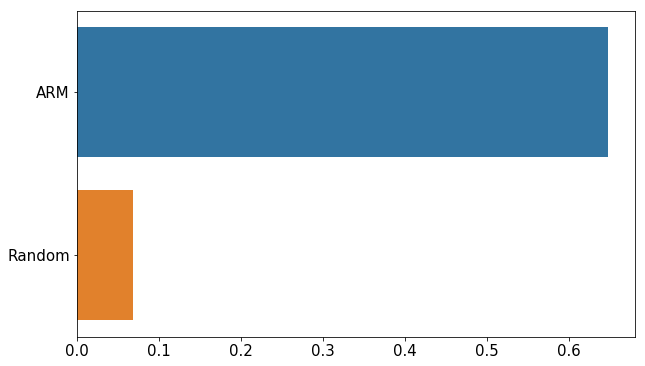

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
rc={'axes.labelsize': 13, 'font.size': 15, 'legend.fontsize': 32.0, 'axes.titlesize': 32}
plt.rcParams.update(**rc)
sns.barplot([accuracy_arm, accuracy_benchmark], ['ARM', 'Random'])